In [1]:
import gym
import tensorflow as tf
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from rl_utils import load_expert_policy, SupervisedPolicy, run_rollouts

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=25)
    display(display_animation(anim, default_mode='loop'))

Using TensorFlow backend.


In [2]:
env, pi_expert = load_expert_policy('roboschool-cheetah')
print(env.observation_space.shape)
print(env.action_space.shape)
frames = []

obs = env.reset()
# print(obs)
# print(obs.shape)
for i in range(60):
    a = pi_expert.act(obs)
    obs, r, done, _ = env.step(a)
    # frames.append(env.render(mode = 'rgb_array'))

loaded :3
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: Environment '<class 'roboschool.gym_mujoco_walkers.RoboschoolHalfCheetah'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
(26,)
(6,)


In [3]:
# Testing
# display_frames_as_gif(frames)

In [4]:
# Loading a learner
print(env.step(a))
noob = SupervisedPolicy(env)
env.reset()
observations, actions, rewards = run_rollouts(env, pi_expert, env.spec.timestep_limit, 20)

(array([-1.7695065e-01,  0.0000000e+00,  1.0000000e+00,  2.3123174e+00,
        0.0000000e+00, -2.2450489e-01, -0.0000000e+00,  1.5192282e-01,
        2.9685840e-01,  3.6177155e-01, -6.3485879e-01, -1.8536510e+00,
        7.7640647e-01,  2.7962301e+00,  9.5991367e-01,  4.4346029e-01,
       -3.8693583e-01, -3.0179113e-01,  1.0000110e+00, -9.3123250e-05,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00,
        0.0000000e+00,  0.0000000e+00], dtype=float32), 2.603332527305115, False, {})
500/1000
1000/1000
500/1000
1000/1000
500/1000
500/1000
1000/1000
500/1000
1000/1000
500/1000
1000/1000
500/1000
1000/1000
500/1000
1000/1000
500/1000
1000/1000
500/1000
500/1000
1000/1000
500/1000
1000/1000
500/1000
1000/1000
500/1000
1000/1000


In [6]:
obs = env.reset()
# print(obs)
# print(obs.shape)
for i in range(60):
    a = pi_expert.act(obs)
    obs, r, done, _ = env.step(a)
    frames.append(env.render(mode = 'rgb_array'))


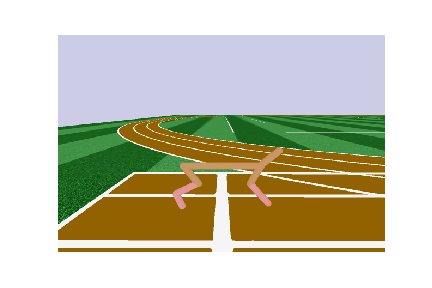
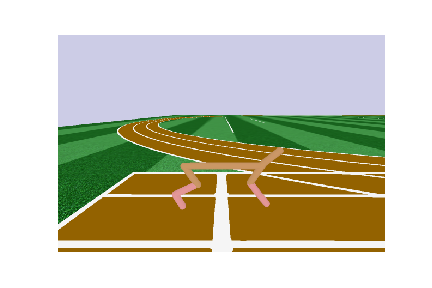
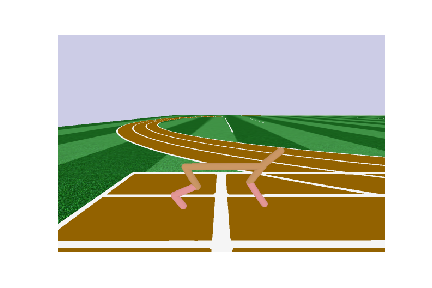
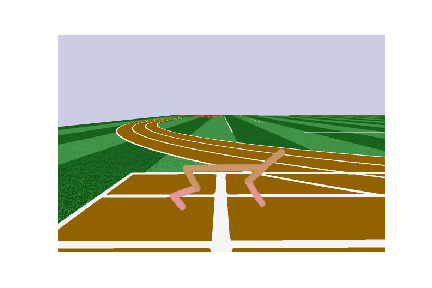
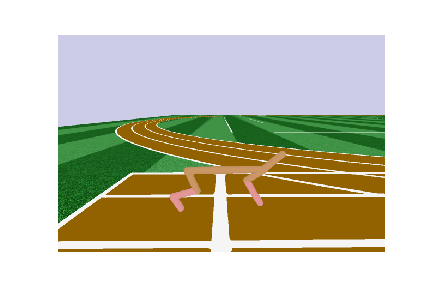
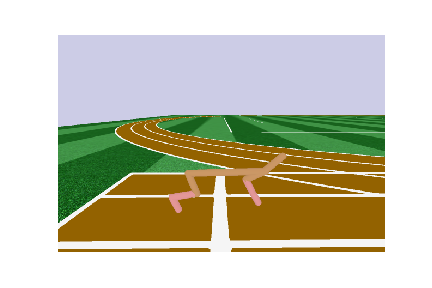
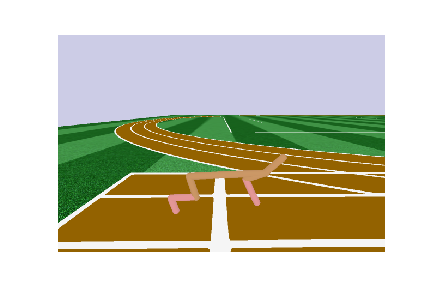
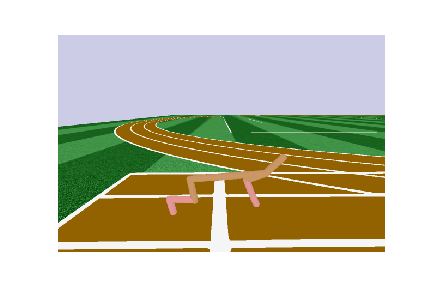
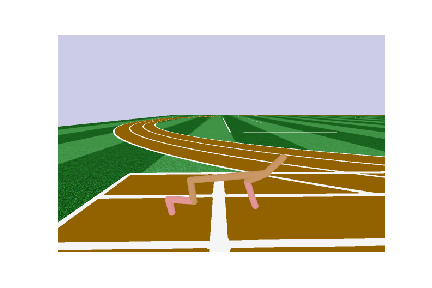
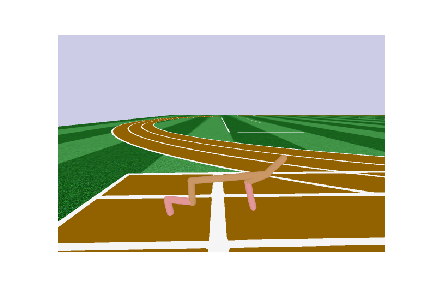
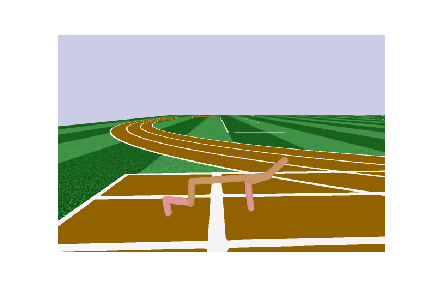
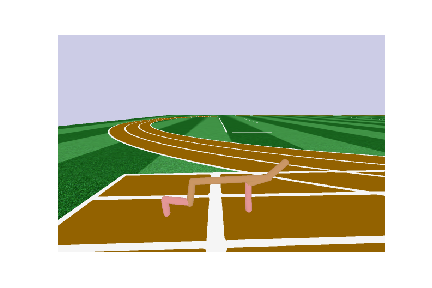
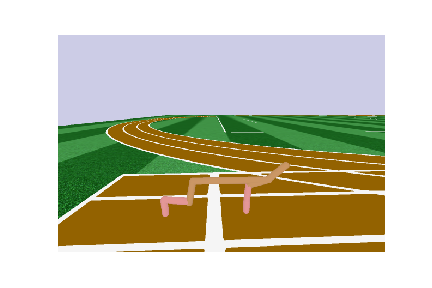
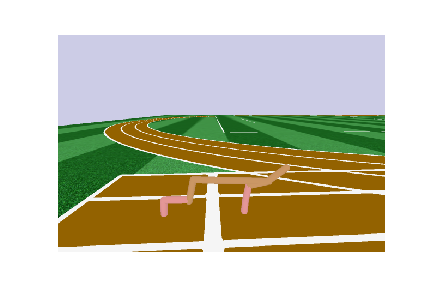
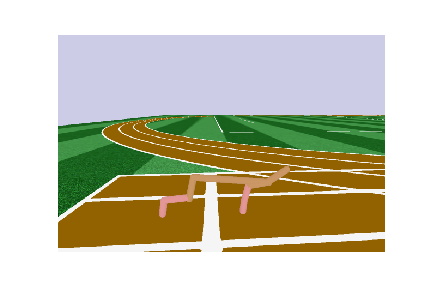
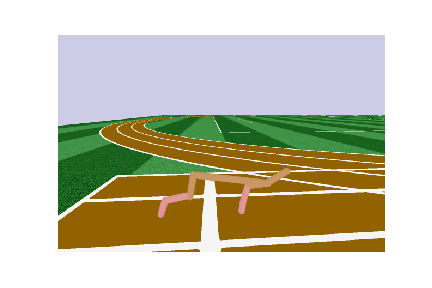
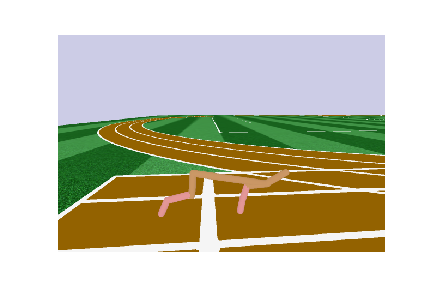
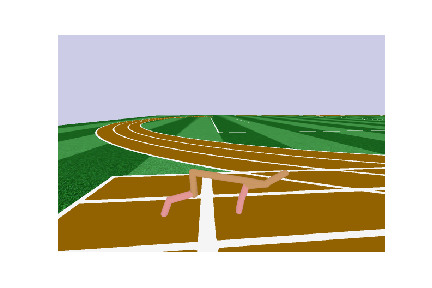
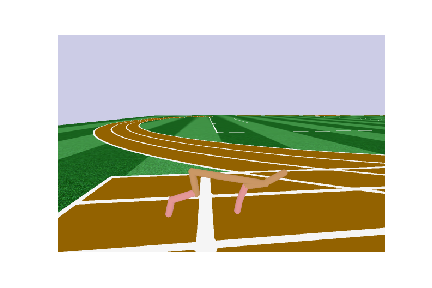
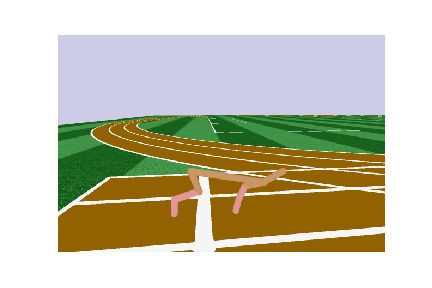
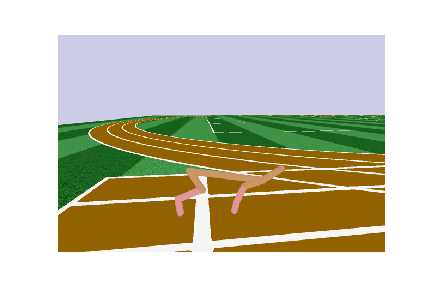
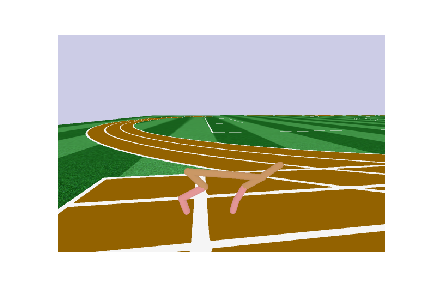
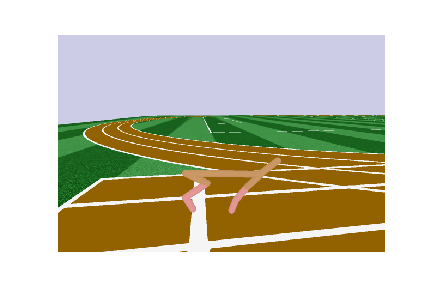
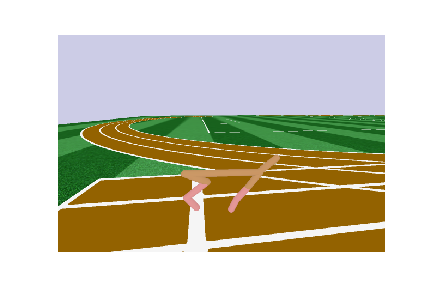
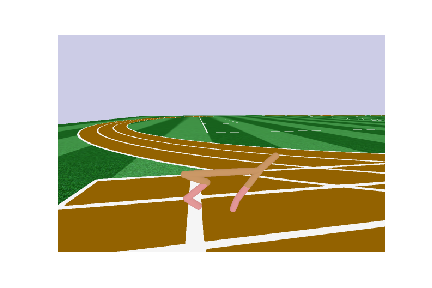
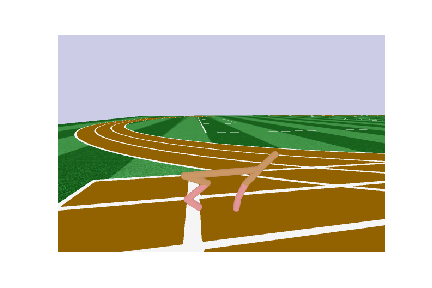
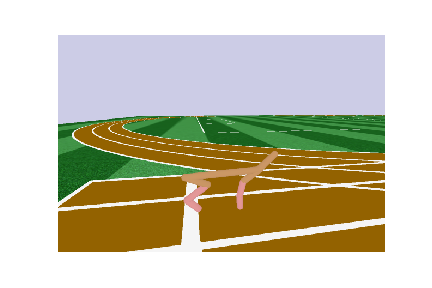
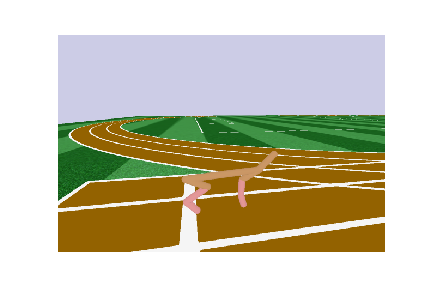
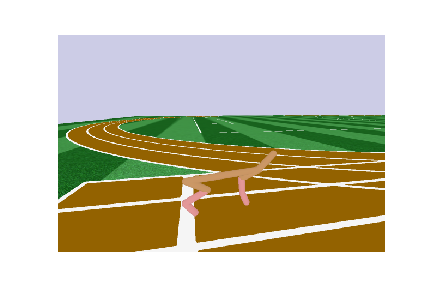
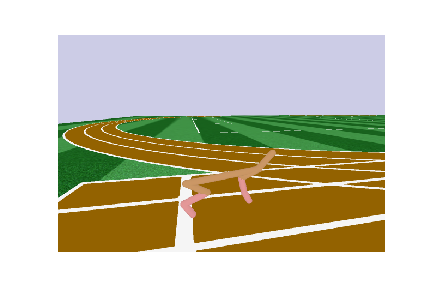
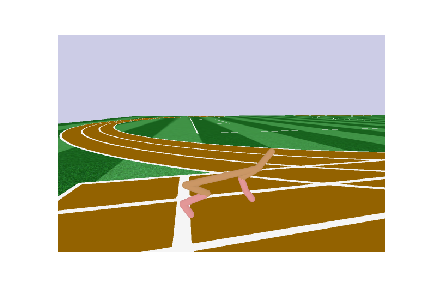
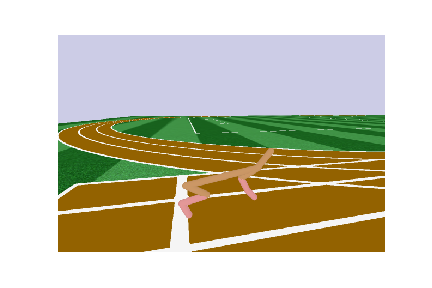
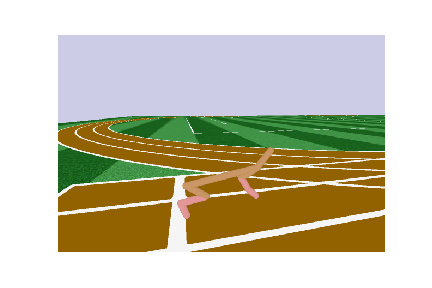
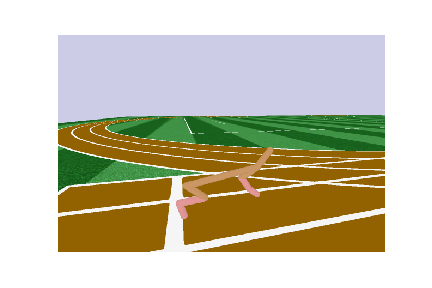
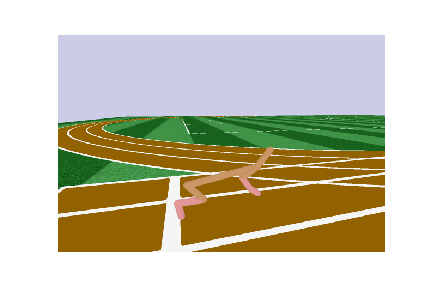
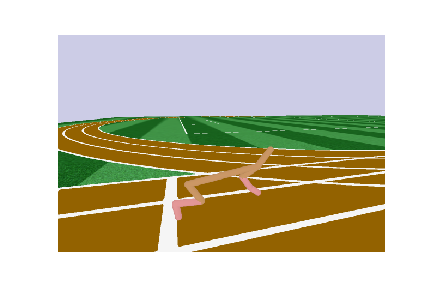
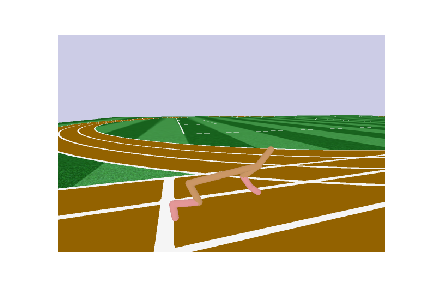
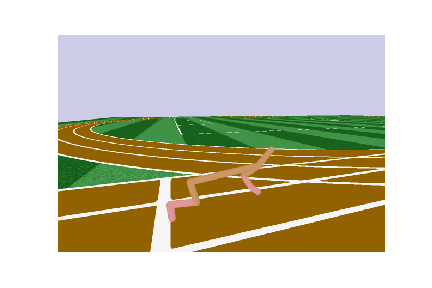
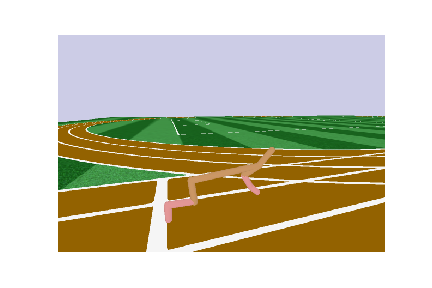
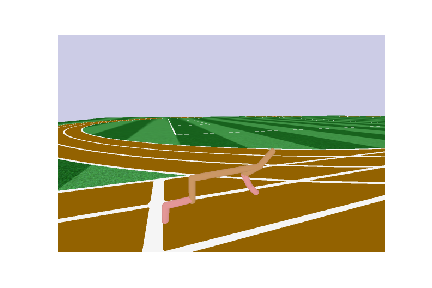
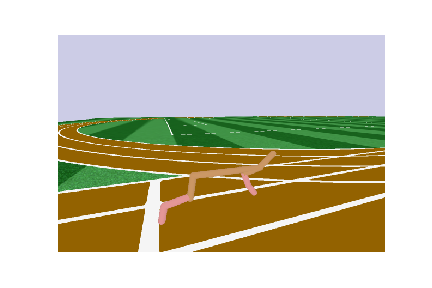
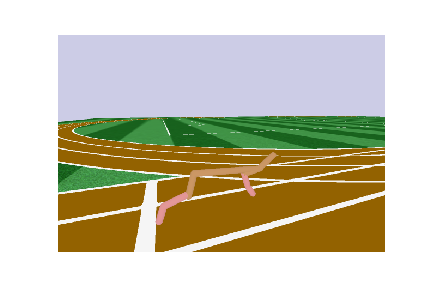
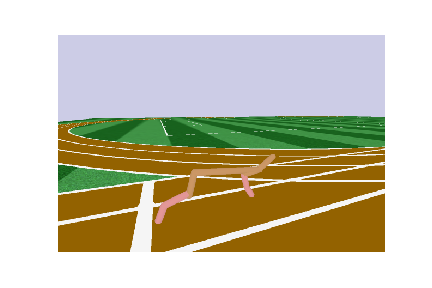
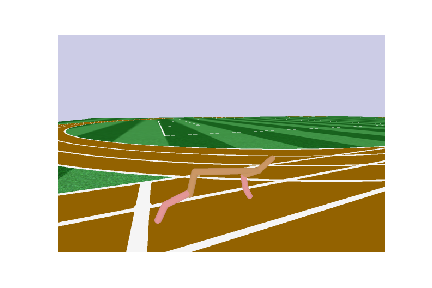
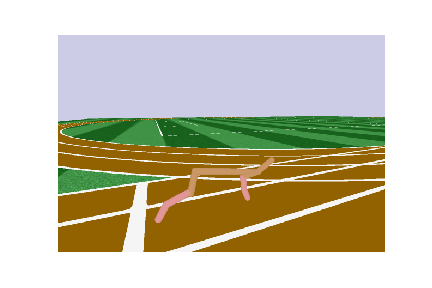
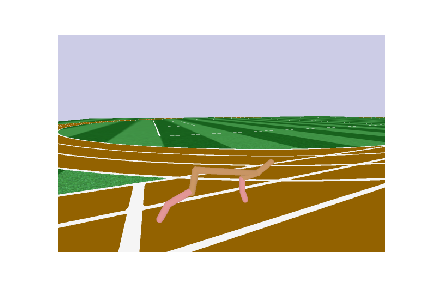
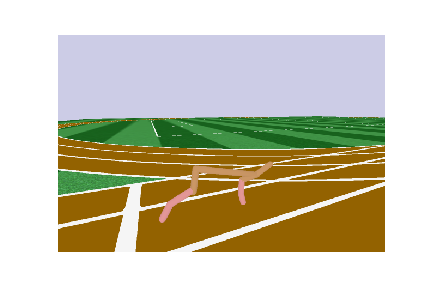
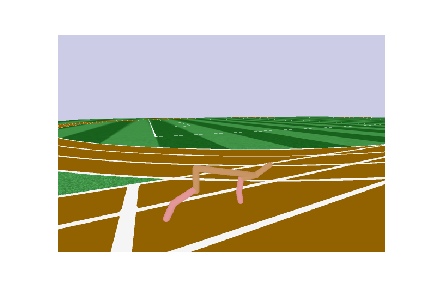
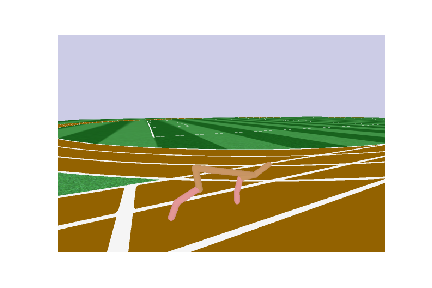
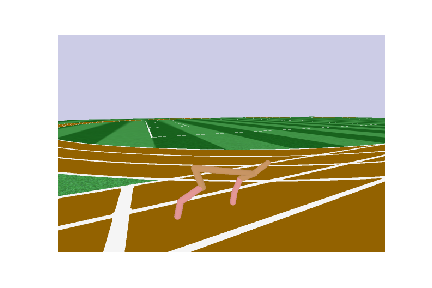
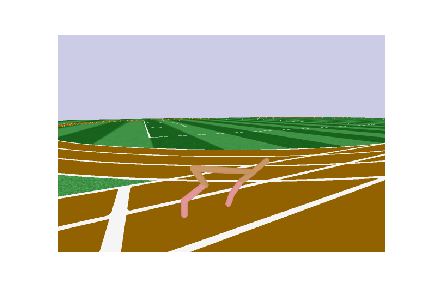
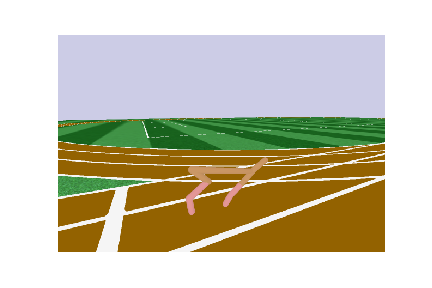
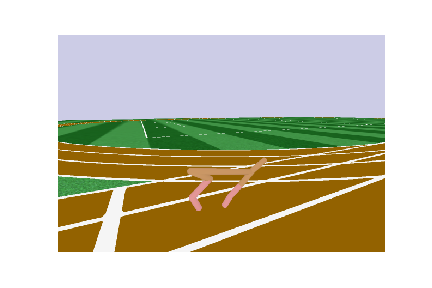
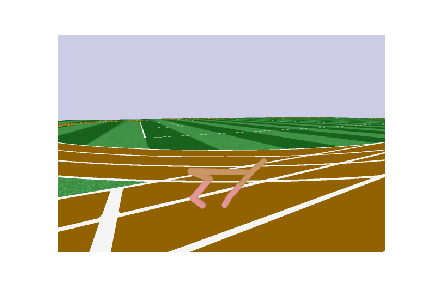
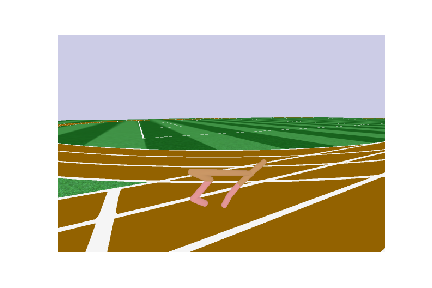
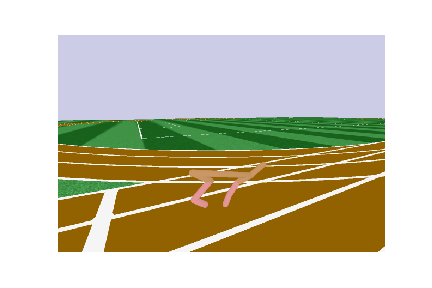
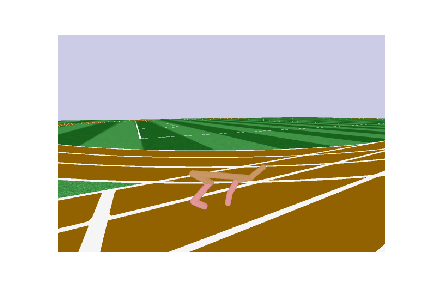
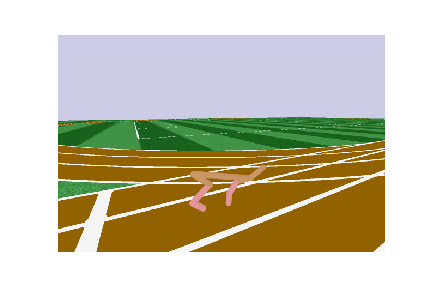
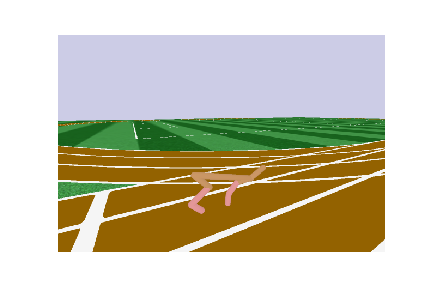
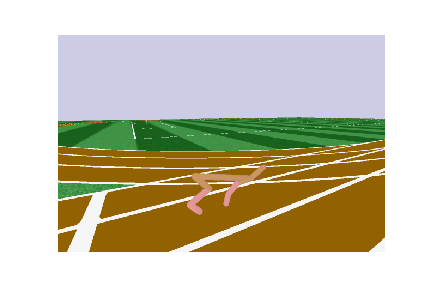

In [7]:
# Testing
display_frames_as_gif(frames)